# Project at Intelligent Systems & Machine Learning Models
* **Course name:**  Open Source Tools for Intelligent Systems
* **Course number:** 65020
* **Student name:**  Lior Ben Hemo
* **Kaggle link:** https://www.kaggle.com/liorbh

#  **Abstract**

This article will deal with the topic of forecasting based on data.
As part of a Kaggle-sponsored competition, a database was provided, 
based on which a forecast for future apartment prices must be made.

In this article I will present the working methods, 
the data analysis and the manner of operations that we will use in order to build a model 
that will help us with the goal of forecasting future apartment prices.
In addition, in the article we will be able to derive the conclusions from the course of action that 
I will present and analyze it based on the theory we know.


# **1. Introduction**
In this article I will explore the training data that was provided and build a linear regression model in order to predict the apartment prices for the test data.
The method of work will be carried out as follows:

# House Prices

 **Exploring data**
*    loading data
*    get information
*    type of features

 **Data preprocessing**
*    missing value
*    fill value replacment null value
*    plot of target

3. **feature selection**
*    numeric features 
*    Outliers
*    categorial features
*    Encoding to categorial feature

 **Cross Validation**

 **Modeling**
*    Split training and validation data
*    model running

 **Submission**


# **2. Methods**

* **Exploring data-** This is a stage where we will understand the training data, i.e. who are the features, what do they contain, who is the response (target), how does the data unfold, etc.
* **Data preprocessing-** This is a stage where we will perform a preliminary stage for the data so that we can start working with them, in this stage we will actually perform a cleaning of the data, understanding the noise in the data (for example: missing values), etc.
* **feature selection-** This is a stage where we will understand which of the features is dominant, i.e. who influences the target and who doesn't, if so, at what level does it influence? (Statistically, you can ask: what is the level of correlation between the features and the target)
Of course, the purpose of the stage is to remove the features that are less dominant.
Note: It should be noted that there are features of two types (numerical) and non-numerical (categorical), this situation requires us to use the method called "encoding" and we will see how this is done later.
* **Cross Validation-** A statistical method for splitting the data into a training set and a validation set.
With the help of this method we can test the model to change it on a subgroup that we call a validation group which we basically cut out of the training set.
This action allows us to understand the accuracy of our prediction when a validation group simulates the test set and thus we can make the model as accurate as possible before examining it on the test set.

#  Exploring data

At this stage we will investigate and understand the nature of the data.
Who are the features (features) and what type are they, their size (rows and columns) in addition we will investigate and understand about the response (target).
A little help with visualization.

**importing libraries**

In [1]:
# tools for dataframe
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
 
#tools for preprocessing    
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from scipy.stats import norm

#tools for feature selection
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import f_classif

#tools for cross validation

#tools for model 
from sklearn import metrics
from sklearn import pipeline
from sklearn import metrics
from sklearn import linear_model
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LassoLars, SGDRegressor, Ridge, LogisticRegression, BayesianRidge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

**Loading the data**

In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
ID=test['Id']

**get information**

get first information and intuition about the features,size of data, types of data etc... 

In [3]:
# show the train data
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# show the test data
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


We will understand how the data is distributed, the average of the data, the standard deviation, etc.

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
print(f'train size: {train.shape}')
print(f'test size: {test.shape}')

train size: (1460, 81)
test size: (1459, 80)


**type of features**

We will divide the data into two types:
* Numerical types - quantitative, numerical variables.
* Categorical types - qualitative variables, not numerical.

In [7]:
num_vars = train.columns[train.dtypes != 'object']
obj_vars = train.columns[train.dtypes == 'object']

print('\nNumerical vars: ')
print(num_vars.values)

print('\nObject vars: ')
print(obj_vars.values)


Numerical vars: 
['Id' 'MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold'
 'SalePrice']

Object vars: 
['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'
 'GarageCond' 'Pav

# Data preprocessing

**Missing value**

Find the missing values in the data.
First we will understand which are the features in which there are missing values.
After that we will understand what the amount is for each value - in the values where there is a very high amount of values (say 60%) we will simply subtract them from the data.
And in the values where there is less than the threshold we set, we will complete these cells with the help of a mathematical function.
The function I chose is called 'most_frequent' and it will complete the missing cell for the most frequent cell in that particular column.

In [8]:
#Finding features with missing values
def miss_value(df):
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    missing.sort_values(inplace=True)
    missing.plot.bar()
    
#remove the features with above %60 missing values.
def rem_miss(df):
    pct_null = df.isnull().sum() / len(df)
    missing_features = pct_null[pct_null > 0.6].index
    df.drop(missing_features, axis=1, inplace=True)

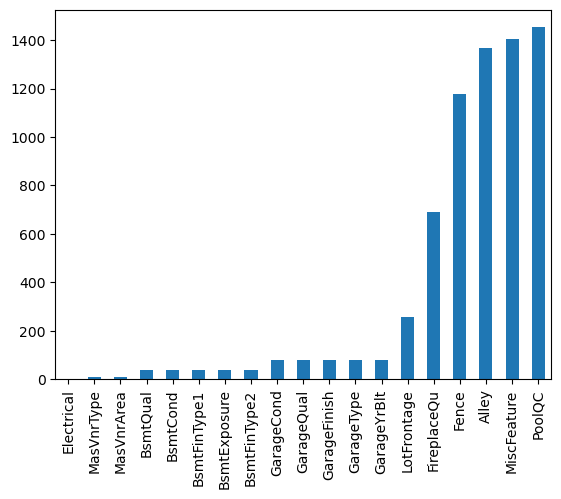

In [9]:
#clean the train data
miss_value(train)
rem_miss(train)

It can be seen that there are quite a few features with missing values and there are even a number of features whose amount of missing values is significantly greater. This adds a lot of noise to the data and therefore it is necessary to remove the features with the high amount and for the rest to run a statistical method that will replace the empty values with other values (average, median, standard deviation, etc.)

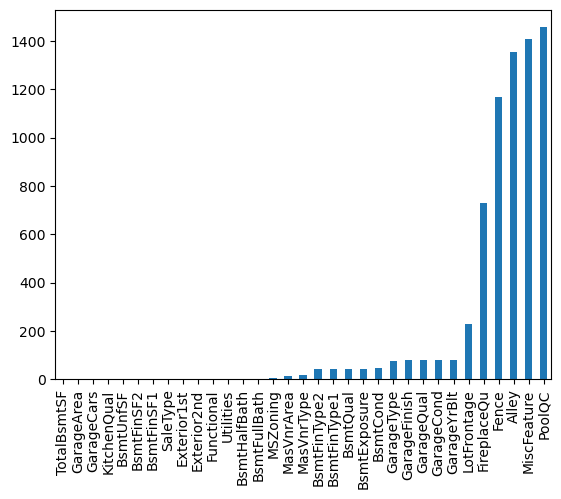

In [10]:
#clean the test data
miss_value(test)
rem_miss(test)

**fill value replacement null value**


'most_frequent' and it will complete the missing cell for the most frequent cell in that particular column.

In [11]:
def fill_miss(df):
    miss = df.isnull().sum()
    miss = miss[miss > 0]
    imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
    imputer = imputer.fit(df)
    df.iloc[:,:] = imputer.transform(df)

       
fill_miss(train)
fill_miss(test)    


**plot target**

In [12]:
target=train['SalePrice']

Log transformation of target variable help lessens the distance between these data points and result in the better model. The sole reason is that logarithms apply only to positive numbers, so any model that estimates logarithms perforce is estimating positive 

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

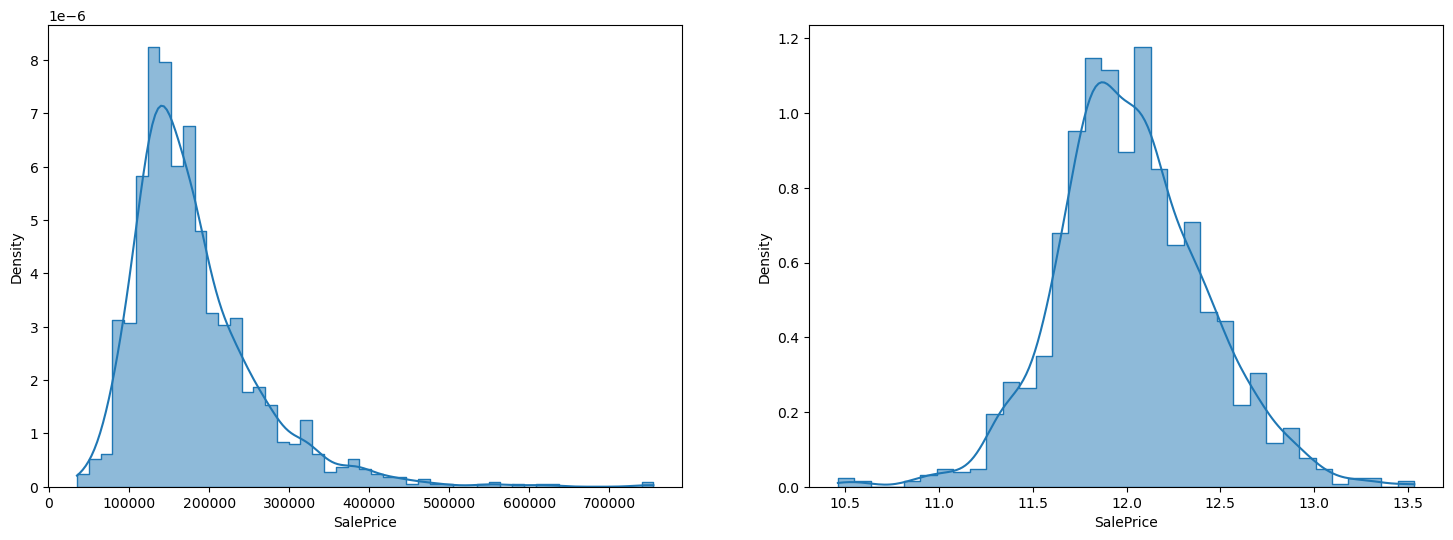

In [13]:
# plot target
fig, ax = plt.subplots(1, 2,figsize=(18,6))
sns.histplot(target,  kde=True, element="step", stat="density",ax=ax[0])
#plot log(target)
logtarget=np.log1p(target)
sns.histplot(x=logtarget, kde=True, element="step", stat="density",ax=ax[1])

#  Feature selection

![](https://machinelearningmastery.com/wp-content/uploads/2019/11/How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png)

**Numeric features**

> This is a regression predictive modeling problem with numerical input variables.
The most common techniques are to use a correlation coefficient, such as Pearson's for a linear correlation, or rank-based methods for a nonlinear correlation.
* Pearson's correlation coefficient (linear).
* Spearman's rank coefficient (nonlinear)

In our case, we would like to understand the correlation between the numerical variables and the response change and thus know which are the dominant variables (ie with high correlation) and which are less (ie with low correlation) and thus know which of the variables to lower.
Note: You will see later that I chose that having a correlation higher than 0.5 is a dominant rater, but this is a data for selection and not management.

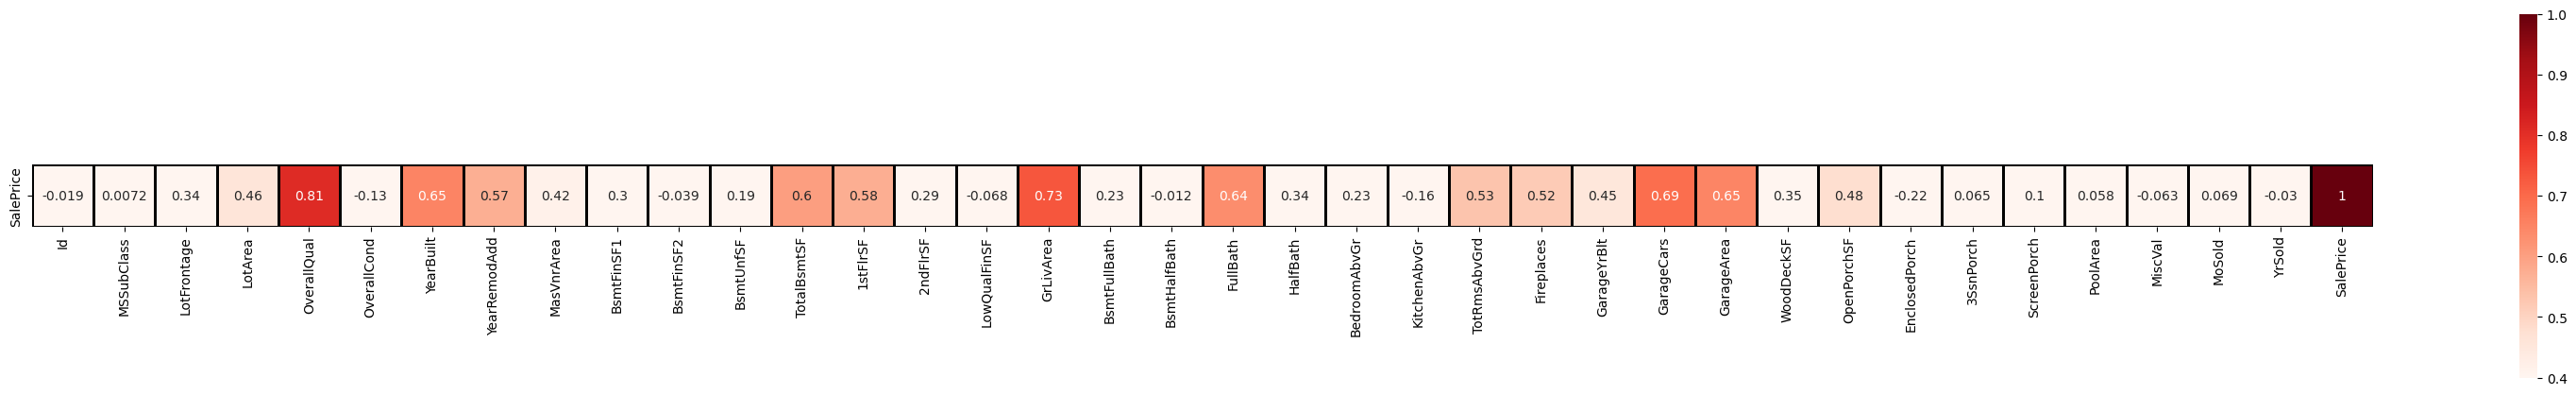

,SalePrice
Id,-0.018546
MSSubClass,0.007192
LotFrontage,0.344344
LotArea,0.456461
OverallCond,-0.129325
YearRemodAdd,0.571159
MasVnrArea,0.415906
BsmtFinSF1,0.301871
BsmtFinSF2,-0.038806
BsmtUnfSF,0.185197


In [14]:

mat_corr=train.corr(method='spearman')[['SalePrice']]
plt.figure(figsize=(40,10))
sns.heatmap(np.transpose(mat_corr), annot=True, vmin=0.4, vmax=1, cmap=plt.cm.Reds,linecolor='black',cbar_kws={"shrink": .5},linewidth=.9,square=True)
sns.set(font_scale=1.2)
plt.show()
feat_rem = mat_corr[abs(mat_corr.SalePrice)<0.6]
feat_rem



A positive sign means that the relationship between the variable and the elevation is positive
A negative sign means that the relationship between the variable and the response is negative
But in this case we don't care about the sign because we want to understand which features have a high correlation (I set the threshold 60%) with the response.
It can be seen that out of 37 numerical features, 30 have a correlation lower than 60%.
That means we are left with 7 numerical features whose effect on the response is significant.

In [15]:
# remove columns with low corrolation
train=train.drop(columns=np.array(feat_rem.index), axis=0)
test=test.drop(columns=np.array(feat_rem.index), axis=0)

print('train data:', train.shape)
print('test data:',test.shape)

train data: (1460, 47)
test data: (1459, 46)


array([[<AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>],
       [<AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'GarageCars'}>],
       [<AxesSubplot:title={'center':'GarageArea'}>,
        <AxesSubplot:title={'center':'SalePrice'}>, <AxesSubplot:>]],
      dtype=object)

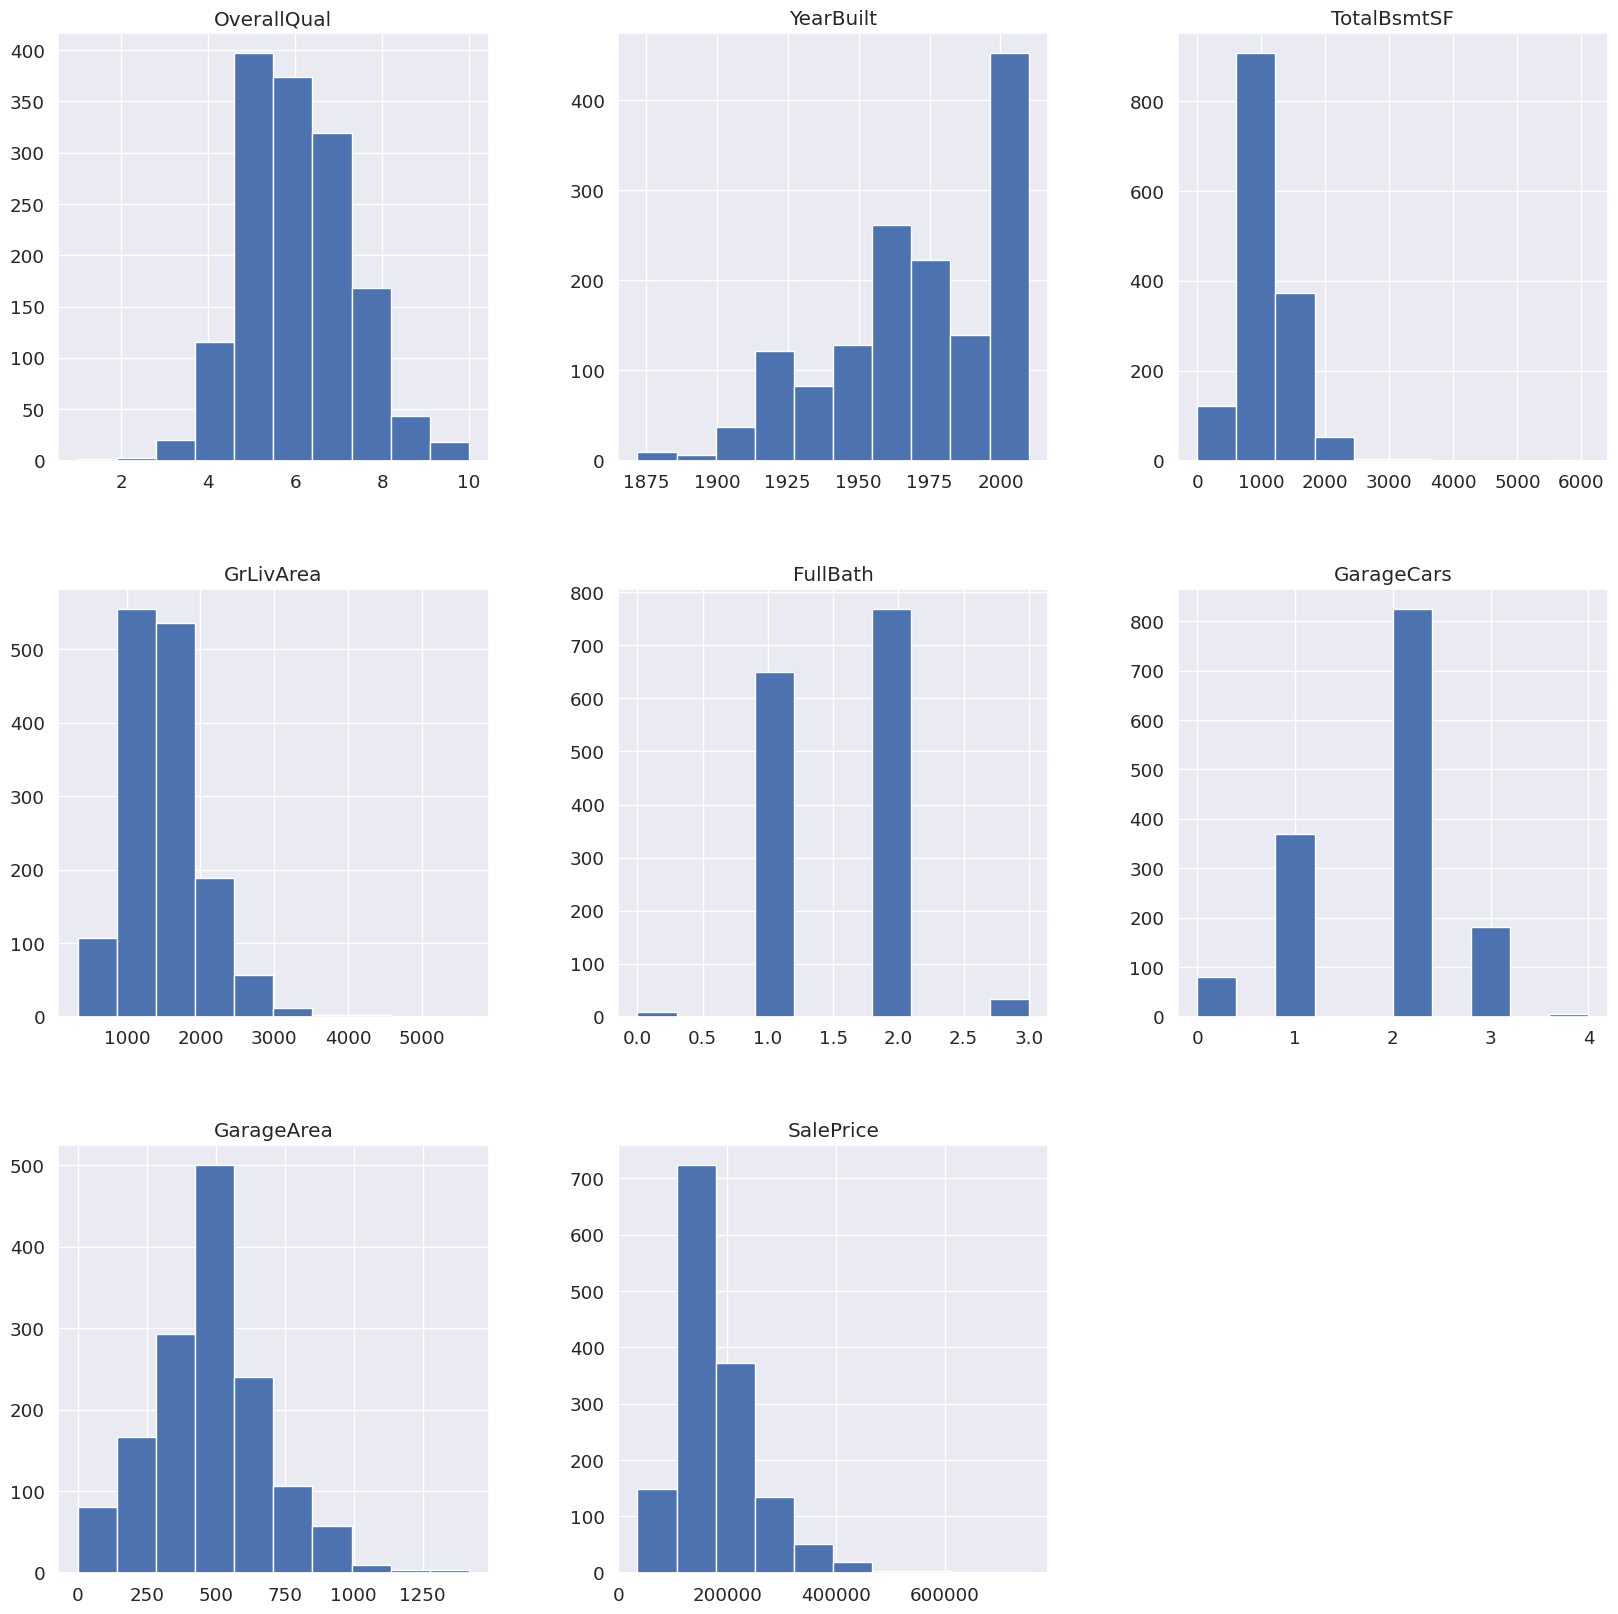

In [16]:
#Plot numerical featuers
train.hist(figsize=(20,20))

**Outliers - train**

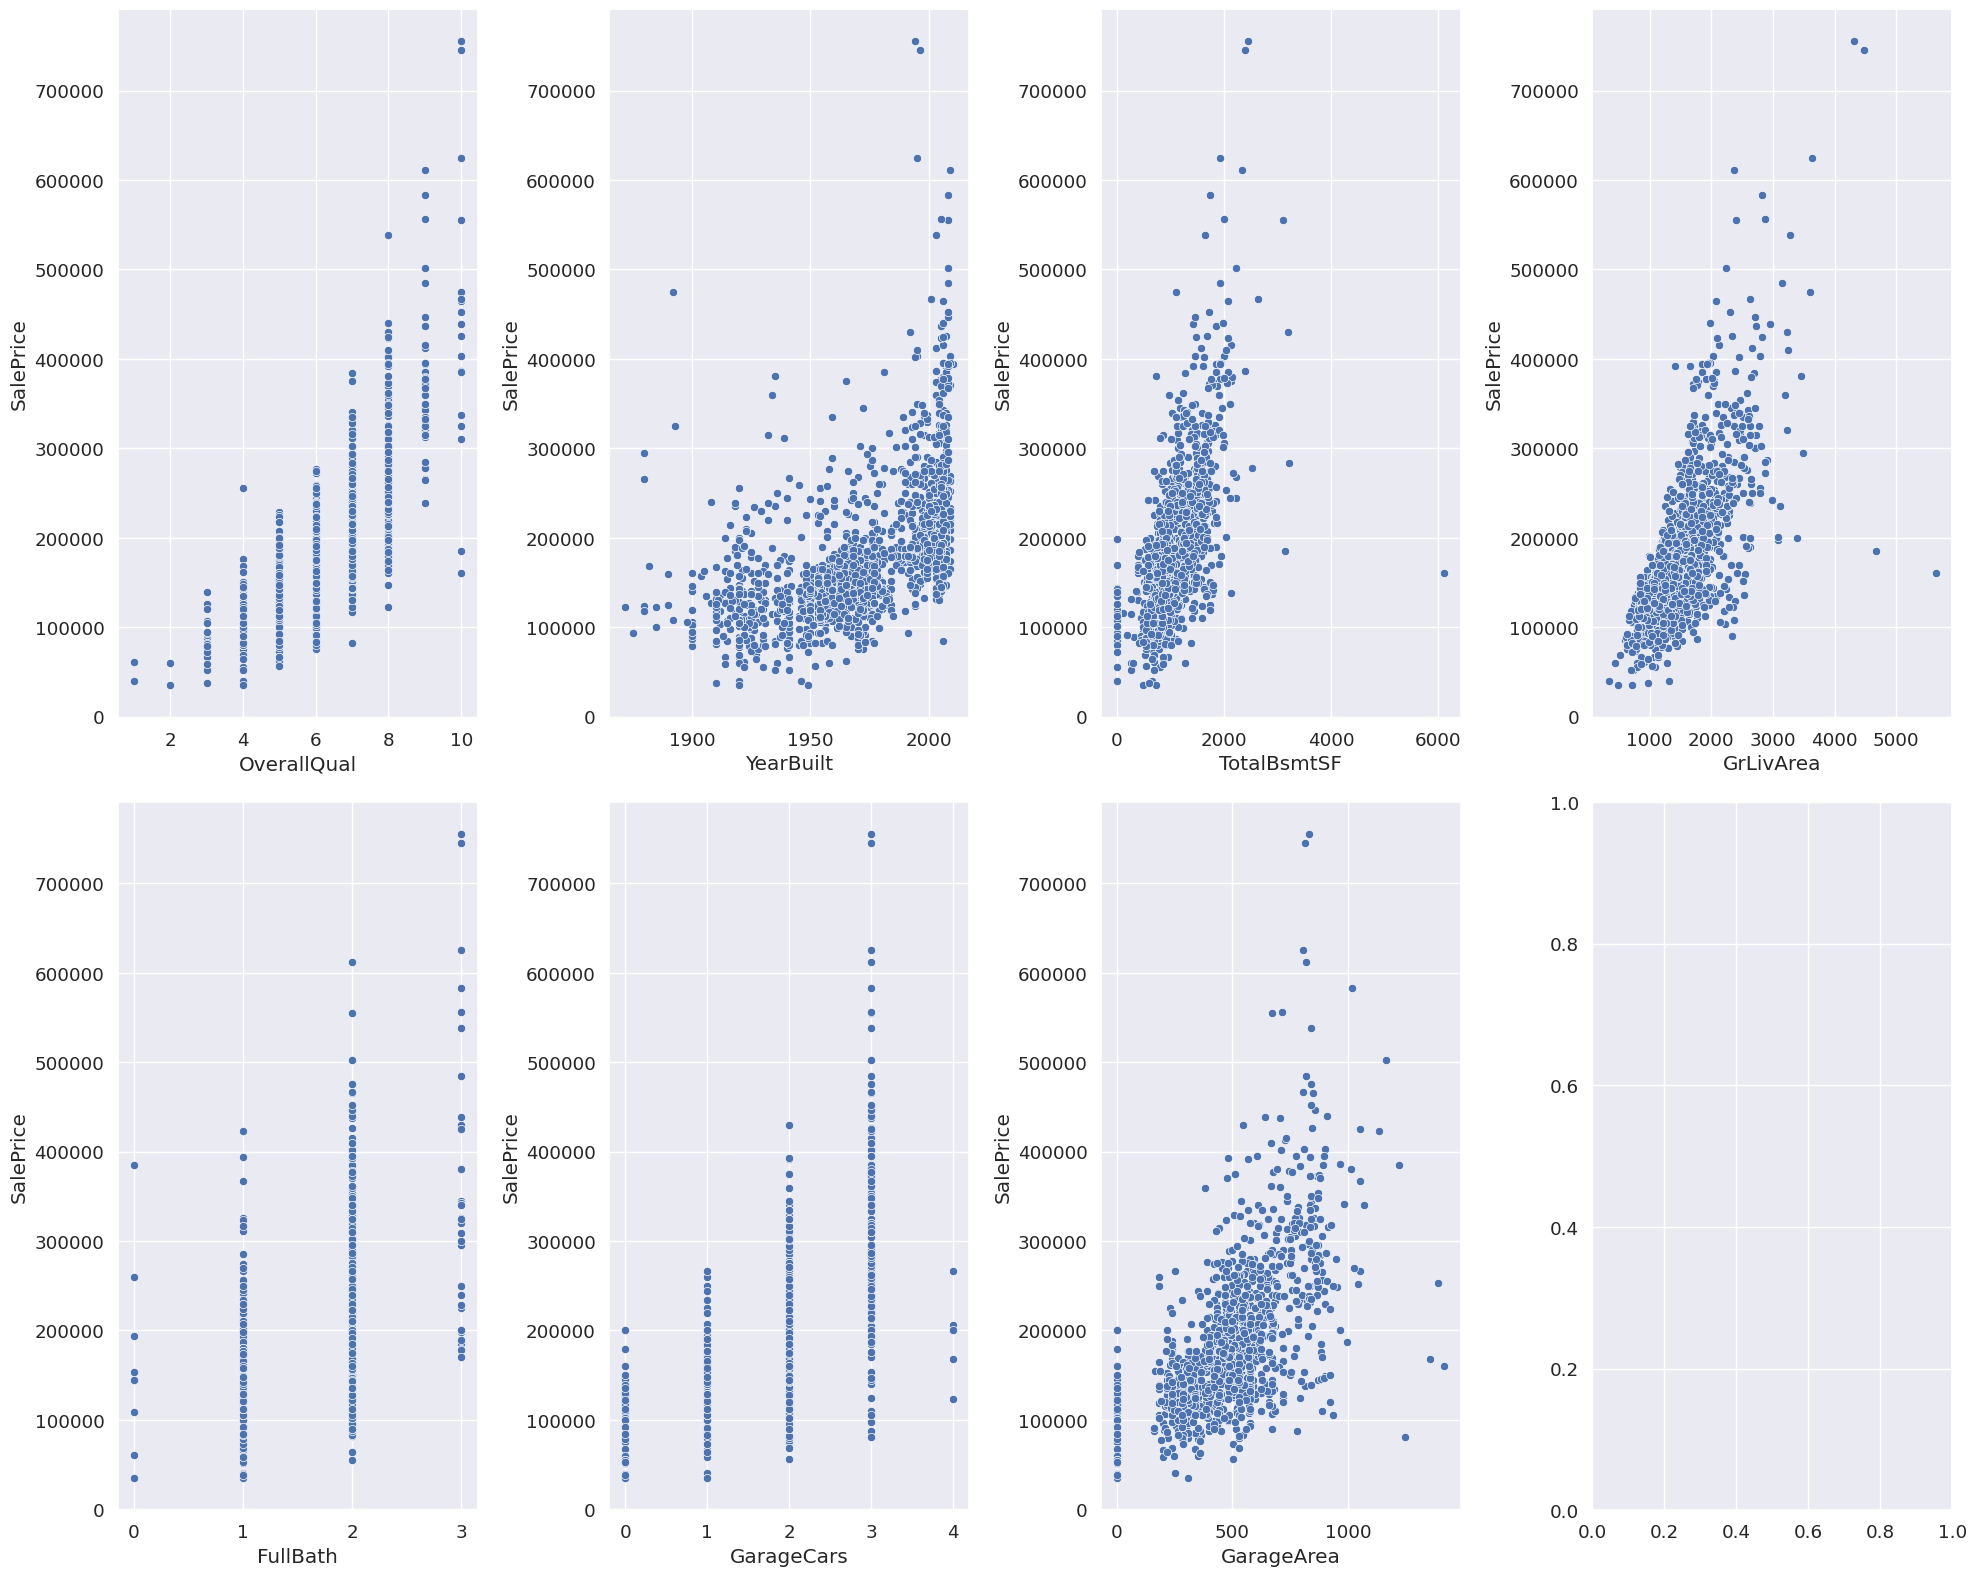

In [17]:
numeric = train.columns[train.dtypes != 'object']
ncols =4
nrows= 2
fig, ax = plt.subplots(nrows, ncols,figsize=(20,16))
for i , col in enumerate(numeric[:-1]):
    sns.scatterplot(x=col, y=train['SalePrice'], data=train, ax=ax[i//ncols, i%ncols])
fig.tight_layout()
plt.show()

In [18]:
#train[train.SalePrice>700000]
#train = train[train.SalePrice<700000]

In [19]:
# Outliers of the train
#train_original=train.copy()
train=train[train.GrLivArea < 5000]
#train=train[train.TotalBsmtSF < 4000]
#test=test[test['1stFlrSF'] < 4000]
#train=train[train.GarageArea<1200]
#train=train[train.TotRmsAbvGrd<12.5]
train.reset_index(drop = True, inplace = True) #rest index
train.index
train.shape

(1459, 47)

**Outliers - test**

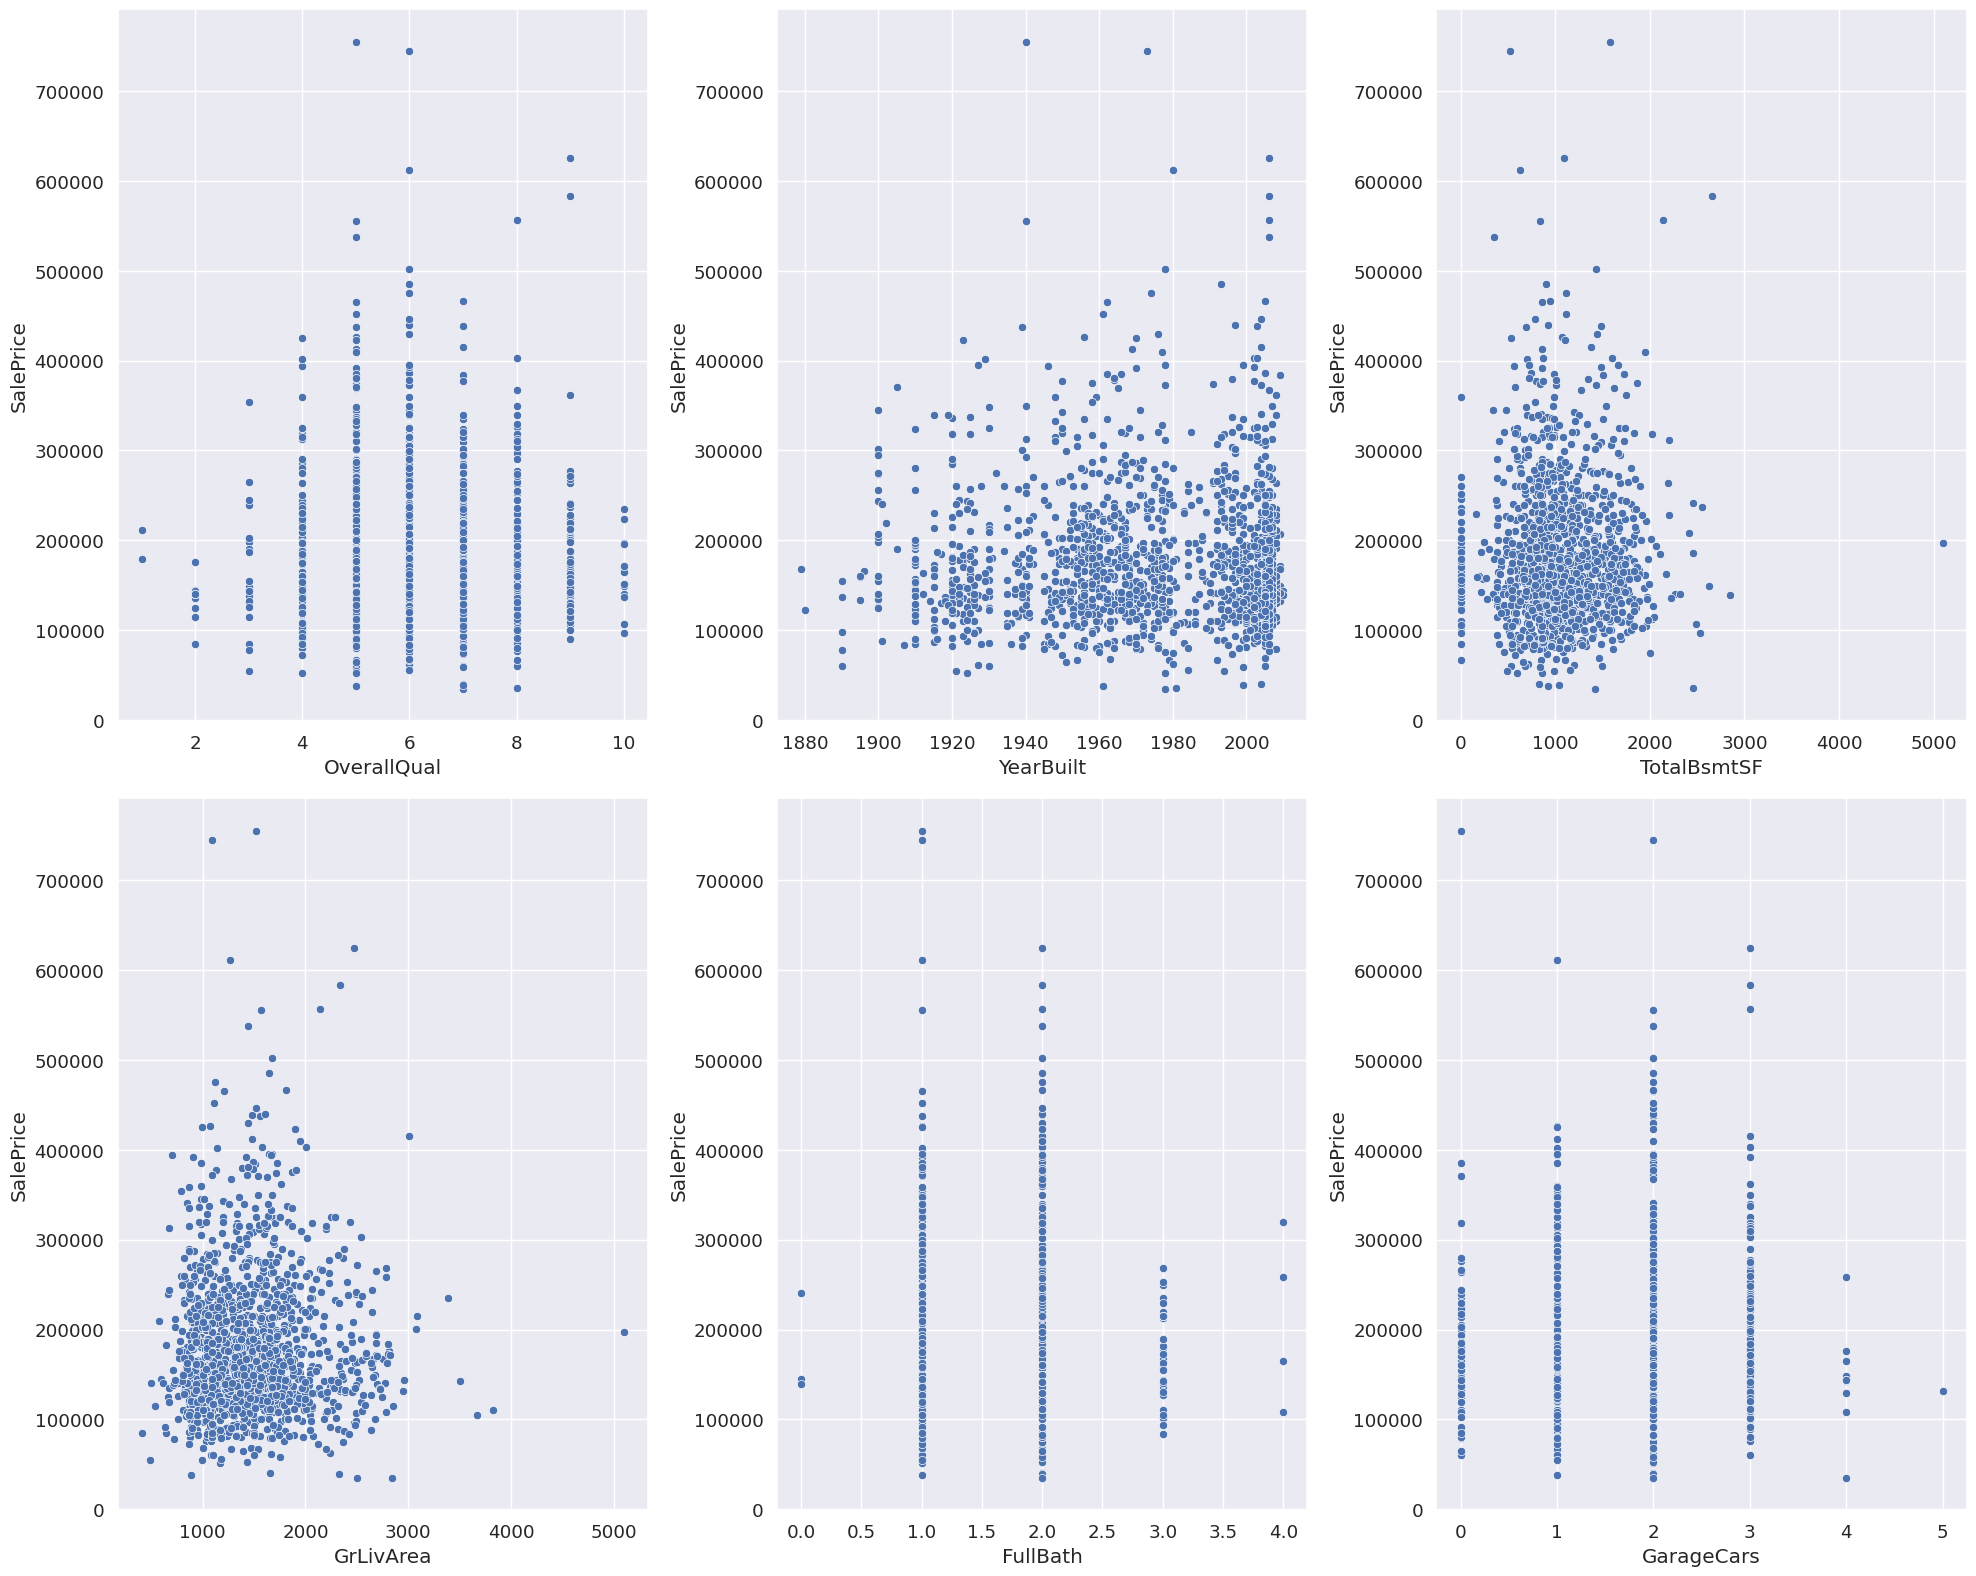

In [20]:
numeric = test.columns[test.dtypes != 'object']
ncols =3 
nrows= 2
fig, ax = plt.subplots(nrows, ncols,figsize=(20,16))
for i , col in enumerate(numeric[:-1]):
    sns.scatterplot(x=col, y=target, data=test, ax=ax[i//ncols, i%ncols])
fig.tight_layout()
plt.show()

In [21]:
# Outliers of the test
#train_original=train.copy()
#print('index_removed:',np.where(test.TotalBsmtSF >= 4000))
#test=test[test.TotalBsmtSF < 4000]
#test=test[test['1stFlrSF'] < 3000]
#print('index_removed:',np.where(test.GrLivArea >= 3550))
#test=test[test.GrLivArea < 3550]
#test=test[test.TotRmsAbvGrd < 13]
#test=test[test.Fireplaces < 3.8]
#print('index_removed:',np.where(test.GarageCars >= 4.1))
#test=test[test.GarageCars < 4.1]
#print('index_removed:',np.where(test.FullBath <= 0))
#test=test[test.FullBath > 0]
#test.reset_index(drop = True, inplace = True) #rest index
#test.index
test.shape

(1459, 46)

In [22]:
# rest ID index wuth similar index number
#ID.drop([1089,738,1361,368,398,1051,1137], axis=0, inplace=True)
#ID.drop(index,axis=0)
#ID.reset_index(drop = True, inplace = True) #rest index
#ID.index
#df.drop([1089,738,1361,368,398,1051,1137], axis=0, inplace=True)

**feature selection - categorial**

**Categorial features**
> This is a classification predictive modeling problem with categorical input variables.
> The most common correlation measure for categorical data is the chi-squared test. You can also use mutual information (information gain) from the field of information theory.

*  Chi-Squared test (contingency tables).
*  Mutual Information.

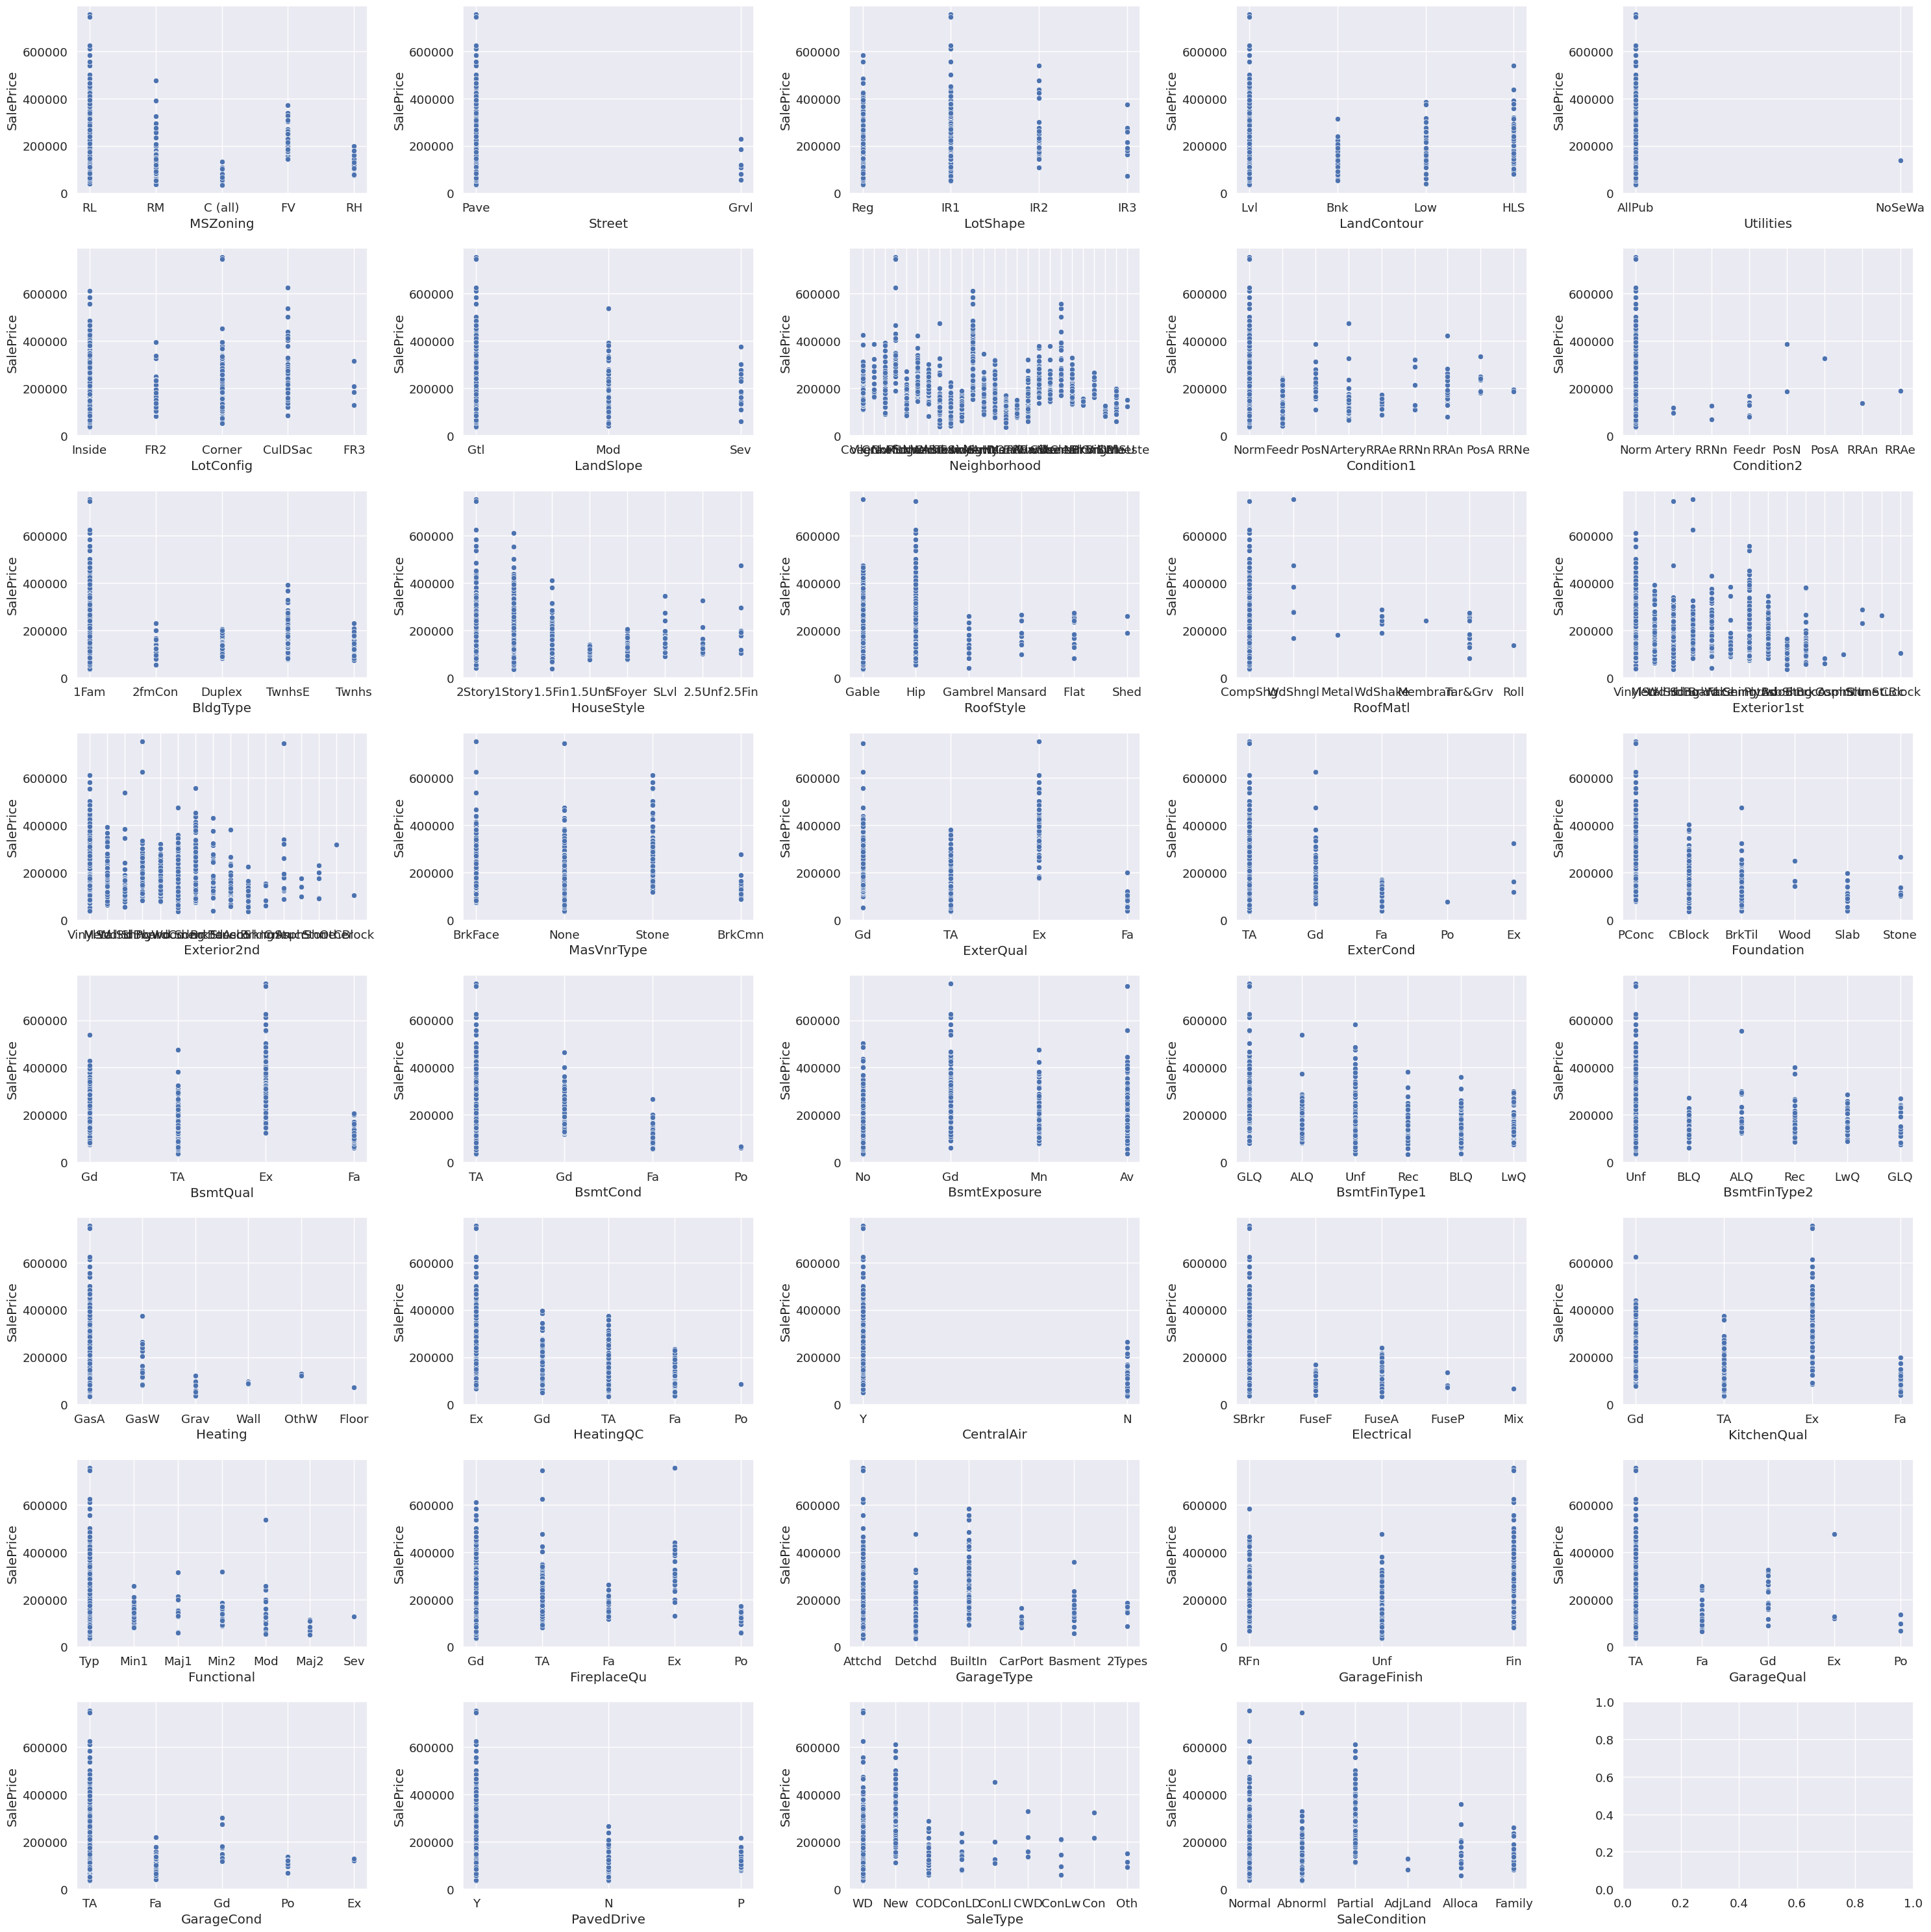

In [23]:
categorial =  train.columns[train.dtypes == 'object']
ncols = 5
nrows= 8
fig, ax = plt.subplots(nrows, ncols,figsize=(30,30))
for i , col in enumerate(categorial):
    sns.scatterplot(x=categorial[i], y=train['SalePrice'], data=train, ax=ax[i//ncols, i%ncols])
fig.tight_layout()
plt.show()

In [24]:
X_caregorical = train.select_dtypes(include='object')
Y=  train['SalePrice']

Feature 0: 113.824636
Feature 1: 3.650595
Feature 2: 803.049895
Feature 3: 123.481898
Feature 4: 242.166667
Feature 5: 564.126379
Feature 6: 890.215162
Feature 7: 2194.755989
Feature 8: 212.469460
Feature 9: 27.336371
Feature 10: 1950.032251
Feature 11: 813.935344
Feature 12: 356.276113
Feature 13: 3234.049873
Feature 14: 696.051686
Feature 15: 808.706651
Feature 16: 161.548449
Feature 17: 209.776603
Feature 18: 87.805592
Feature 19: 302.601489
Feature 20: 342.133748
Feature 21: 99.542110
Feature 22: 442.241261
Feature 23: 792.491114
Feature 24: 110.083545
Feature 25: 67.610345
Feature 26: 1482.760968
Feature 27: 53.808473
Feature 28: 213.389140
Feature 29: 304.385429
Feature 30: 97.671175
Feature 31: 246.119879
Feature 32: 1024.695592
Feature 33: 510.319949
Feature 34: 59.285459
Feature 35: 38.836552
Feature 36: 93.483056
Feature 37: 187.431038
Feature 38: 212.685020


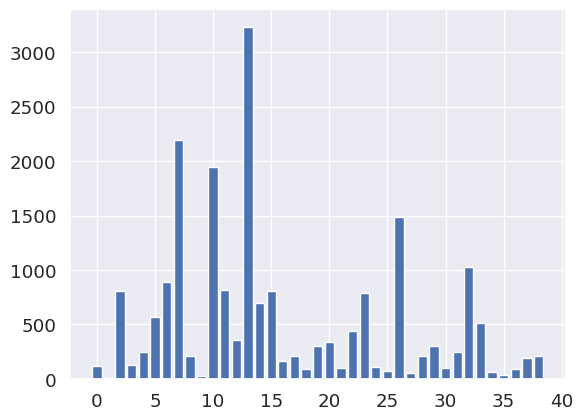

In [25]:
# prepare input data
def prepare_inputs(X_train):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    return X_train_enc
 
# prepare target
def prepare_targets(y_train):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    return y_train_enc
 
# feature selection
def select_features(X_train, y_train):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    return X_train_fs, fs
 
# define X & Y
X_train, y_train = (X_caregorical, Y)
# prepare input data
X_train_enc = prepare_inputs(X_train)
# prepare output data
y_train_enc= prepare_targets(y_train)
# feature selection
X_train_fs,  fs = select_features(X_train_enc, y_train_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [26]:
for i in range(len(fs.scores_)):
    if fs.scores_[i]<700:
        print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 113.824636
Feature 1: 3.650595
Feature 3: 123.481898
Feature 4: 242.166667
Feature 5: 564.126379
Feature 8: 212.469460
Feature 9: 27.336371
Feature 12: 356.276113
Feature 14: 696.051686
Feature 16: 161.548449
Feature 17: 209.776603
Feature 18: 87.805592
Feature 19: 302.601489
Feature 20: 342.133748
Feature 21: 99.542110
Feature 22: 442.241261
Feature 24: 110.083545
Feature 25: 67.610345
Feature 27: 53.808473
Feature 28: 213.389140
Feature 29: 304.385429
Feature 30: 97.671175
Feature 31: 246.119879
Feature 33: 510.319949
Feature 34: 59.285459
Feature 35: 38.836552
Feature 36: 93.483056
Feature 37: 187.431038
Feature 38: 212.685020


In [27]:
categorial_feat_rem =X_caregorical.iloc[:,[0,1,3,4,5,6,8,9,12,14,16,17,18,19,20,21,22,24,25,27,28,29,30,31,33,34,35,36,37,38]]
categorial_feat_rem.columns

Index(['MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Condition1', 'Condition2', 'RoofStyle', 'Exterior1st',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'Heating', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [28]:
train=train.drop(columns=categorial_feat_rem.columns,axis=0)
train.head(3)
train.shape

(1459, 17)

In [29]:
test=test.drop(columns=categorial_feat_rem.columns,axis=0)
test.head(3)
test.shape

(1459, 16)

**Encoding to categorial feature**

When the features are not numerical, but categorical, we need to use encoding.
This is a method that essentially turns the categorical variables into numbers by actually encoding the number of times the same value appears.
There are several ways and several methods to perform coding. I chose to use the method:
**LabelEncoder()**. The advantage of this method is that it does not add these columns, it remains in the existing number of columns, but coded.
I also tried to use the **get_dummies()** method but the number of columns increased significantly and so did the error that increased.

In [30]:
def enc_df(df):
    for col in  df.columns[df.dtypes == 'object']:
        df[col] = LabelEncoder().fit_transform(df[col])
          
enc_df(train)
enc_df(test)
train.head(3)
test.head(3)

,LotShape,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,RoofMatl,Exterior2nd,BsmtFinType1,TotalBsmtSF,HeatingQC,GrLivArea,FullBath,GarageType,GarageCars,GarageArea
0,3,12,0,2,5,1961,0,12,4,882.0,4,896,1,1,1.0,730.0
1,0,12,0,2,6,1958,0,13,0,1329.0,4,1329,1,1,1.0,312.0
2,0,8,0,4,5,1997,0,12,2,928.0,2,1629,2,1,2.0,482.0


#  Cross Validation

the purpose of cross–validation is to test the ability of a machine learning model to predict new data. It is also used to flag problems like overfitting or selection bias and gives insights on how the model will generalize to an independent dataset.

Cross-validation is a statistical method used to estimate the performance (or accuracy) of machine learning models. It is used to protect against overfitting in a predictive model, particularly in a case where the amount of data may be limited. In cross-validation, you make a fixed number of folds (or partitions) of the data, run the analysis on each fold, and then average the overall error estimate.

When dealing with a Machine Learning task, you have to properly identify the problem so that you can pick the most suitable algorithm which can give you the best score. But how do we compare the models?

Say, you have trained the model with the dataset available and now you want to know how well the model can perform. One approach can be that you are going to test the model on the dataset you have trained it on, but this may not be a good practice.

So what is wrong with testing the model on the training dataset? If we do so, we assume that the training data represents all the possible scenarios of real-world and this will surely never be the case. Our main objective is that the model should be able to work well on the real-world data, although the training dataset is also real-world data.

So to know the real score of the model, it should be tested on the data that it has never seen before and this set of data is usually called testing set


In [31]:
t=train['SalePrice']
t=np.log1p(t)
train=train.drop(columns='SalePrice',axis=0)
train.shape

(1459, 16)

> K-fold cross validation is one way to improve the holdout method. This method guarantees that the score of our model does not depend on the way we picked the train and test set. The data set is divided into k number of subsets and the holdout method is repeated k number of times. Let us go through this in steps:

1. Randomly split your entire dataset into k number of folds (subsets)
2. For each fold in your dataset, build your model on k – 1 folds of the dataset. Then, test the    model to check the effectiveness for kth fold
3. Repeat this until each of the k-folds has served as the test set
4. The average of your k recorded accuracy is called the cross-validation accuracy and will serve as your performance metric for the model.

Because it ensures that every observation from the original dataset has the chance of appearing in training and test set, this method generally results in a less biased model compare to other methods. It is one of the best approaches if we have limited input data. 

The disadvantage of this method is that the training algorithm has to be rerun from scratch k times, which means it takes k times as much computation to make an evaluation.


The hyper parameter (K) I chose to use 6.
This value was chosen by several iterations that I performed and this is the value that produced the minimum error - that is, the more accurate model.


In [32]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=6, shuffle=True, random_state=1)
for i, (train_ids, val_ids) in enumerate(kf.split(train)):
    print('Split', i)
    print("Train:", train_ids)
    display(train.loc[train_ids])
    display(t.loc[train_ids])
    print("Val:", val_ids)
    display(train.loc[val_ids])
    display(t.loc[val_ids])
    print()


Split 0
Train: [   0    1    2 ... 1456 1457 1458]


,LotShape,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,RoofMatl,Exterior2nd,BsmtFinType1,TotalBsmtSF,HeatingQC,GrLivArea,FullBath,GarageType,GarageCars,GarageArea
0,3,5,0,5,7,2003,0,13,2,856,0,1710,2,1,2,548
1,3,24,0,2,6,1976,0,8,0,1262,0,1262,2,1,2,460
2,0,5,0,5,7,2001,0,13,2,920,0,1786,2,1,2,608
4,0,15,0,5,8,2000,0,13,2,1145,0,2198,2,1,3,836
5,0,11,0,0,5,1993,0,13,2,796,0,1362,1,1,2,480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,3,8,0,5,6,1999,0,13,5,953,0,1647,2,1,2,460
1455,3,14,0,2,6,1978,0,10,0,1542,4,2073,2,1,2,500
1456,3,6,0,5,7,1941,0,5,2,1152,0,2340,2,1,1,252
1457,3,12,0,2,5,1950,0,8,2,1078,2,1078,1,1,1,240


0       12.247699
1       12.109016
2       12.317171
4       12.429220
5       11.870607
          ...    
1454    12.072547
1455    12.254868
1456    12.493133
1457    11.864469
1458    11.901590
Name: SalePrice, Length: 1215, dtype: float64

Val: [   3   19   30   37   48   49   51   53   56   60   65   75   80   87
   88   91   94  101  104  107  108  111  115  119  120  140  142  158
  159  167  169  177  181  186  190  194  201  204  223  231  236  248
  255  258  259  264  267  268  270  283  288  292  299  301  302  304
  309  321  341  368  375  382  383  399  401  408  409  418  422  442
  443  464  478  481  498  512  516  520  527  535  537  538  547  556
  571  575  579  584  587  593  596  602  613  614  625  628  629  638
  639  640  644  647  654  663  671  674  675  680  685  697  703  707
  709  711  713  719  725  746  748  750  754  761  767  768  771  777
  778  779  780  782  785  799  804  807  815  826  827  828  833  834
  846  855  859  876  881  885  894  899  904  918  920  925  937  940
  948  955  957  968  970  976  977  980  986  991  994  996 1000 1004
 1005 1006 1011 1020 1021 1030 1032 1033 1051 1058 1062 1063 1066 1071
 1073 1079 1091 1094 1098 1100 1105 1108 1112 1113 1125 1128 1130 1132
 

,LotShape,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,RoofMatl,Exterior2nd,BsmtFinType1,TotalBsmtSF,HeatingQC,GrLivArea,FullBath,GarageType,GarageCars,GarageArea
3,0,6,0,5,7,1915,0,15,0,756,2,1717,1,5,3,642
19,3,12,0,2,5,1958,0,10,3,1029,4,1339,1,1,1,294
30,3,9,0,5,4,1920,0,3,5,649,4,1317,1,5,1,250
37,3,12,0,2,5,1954,0,14,4,1297,2,1297,1,1,2,498
48,3,17,1,5,4,1920,0,8,5,736,2,1452,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1436,3,16,0,2,8,2008,0,13,2,1932,0,1932,2,1,3,774
1445,0,11,0,2,5,1962,0,6,4,1188,4,1188,1,1,1,312
1449,3,12,2,5,5,1974,0,13,5,896,4,1792,2,1,0,0
1452,3,11,0,2,5,2006,0,13,5,1140,0,1140,1,1,0,0


3       11.849405
19      11.842236
30      10.596660
37      11.938200
48      11.635152
          ...    
1436    12.885673
1445    11.969724
1449    11.820418
1452    11.344519
1453    12.128117
Name: SalePrice, Length: 244, dtype: float64


Split 1
Train: [   0    1    2 ... 1456 1457 1458]


,LotShape,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,RoofMatl,Exterior2nd,BsmtFinType1,TotalBsmtSF,HeatingQC,GrLivArea,FullBath,GarageType,GarageCars,GarageArea
0,3,5,0,5,7,2003,0,13,2,856,0,1710,2,1,2,548
1,3,24,0,2,6,1976,0,8,0,1262,0,1262,2,1,2,460
2,0,5,0,5,7,2001,0,13,2,920,0,1786,2,1,2,608
3,0,6,0,5,7,1915,0,15,0,756,2,1717,1,5,3,642
4,0,15,0,5,8,2000,0,13,2,1145,0,2198,2,1,3,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,3,8,0,5,6,1999,0,13,5,953,0,1647,2,1,2,460
1455,3,14,0,2,6,1978,0,10,0,1542,4,2073,2,1,2,500
1456,3,6,0,5,7,1941,0,5,2,1152,0,2340,2,1,1,252
1457,3,12,0,2,5,1950,0,8,2,1078,2,1078,1,1,1,240


0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1454    12.072547
1455    12.254868
1456    12.493133
1457    11.864469
1458    11.901590
Name: SalePrice, Length: 1216, dtype: float64

Val: [   6    8   12   27   35   41   47   58   62   73   76   78   81   83
   90   98   99  126  131  133  135  148  154  163  180  188  189  195
  198  200  202  205  208  211  215  216  228  239  241  242  244  250
  262  274  275  280  286  298  303  310  311  315  323  325  330  335
  336  348  349  350  351  355  372  386  390  395  403  404  414  419
  424  426  432  435  439  446  452  453  460  462  480  484  487  490
  493  495  496  503  521  525  528  529  531  534  536  546  553  559
  561  572  573  577  581  597  598  599  612  616  620  623  631  632
  634  649  650  653  669  679  683  701  718  724  730  735  736  737
  741  742  745  757  759  766  774  790  808  810  816  817  819  820
  824  825  830  841  842  858  863  864  867  877  888  890  891  893
  900  902  913  919  922  961  962  966  972  992  993  995 1010 1013
 1015 1016 1028 1035 1036 1041 1047 1048 1055 1064 1068 1076 1080 1083
 1097 1103 1109 1115 1119 1126 1142 1149 1154 1163 1165 1166 1167 1171
 

,LotShape,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,RoofMatl,Exterior2nd,BsmtFinType1,TotalBsmtSF,HeatingQC,GrLivArea,FullBath,GarageType,GarageCars,GarageArea
6,3,21,0,2,8,2004,0,13,2,1686,0,1694,2,1,2,636
8,3,17,0,0,7,1931,0,15,5,952,2,1774,2,5,2,468
12,1,19,0,2,5,1962,0,10,0,912,4,912,1,5,1,352
27,3,16,0,2,8,2007,0,13,2,1704,0,1704,2,1,3,772
35,3,16,0,5,8,2004,0,13,5,1117,0,2452,3,3,3,691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,3,17,1,5,4,1885,0,0,5,777,2,2290,2,5,2,560
1418,0,6,0,2,6,1969,0,10,4,1844,2,1844,2,1,2,540
1433,3,11,0,2,5,1977,0,3,0,1126,1,1126,2,1,2,484
1438,3,14,0,7,7,1979,0,6,2,539,4,1725,2,1,2,550


6       12.634606
8       11.774528
12      11.877576
27      12.631344
35      12.641100
          ...    
1415    11.715874
1418    12.314932
1433    11.982935
1438    12.190964
1443    12.098493
Name: SalePrice, Length: 243, dtype: float64


Split 2
Train: [   0    1    3 ... 1456 1457 1458]


,LotShape,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,RoofMatl,Exterior2nd,BsmtFinType1,TotalBsmtSF,HeatingQC,GrLivArea,FullBath,GarageType,GarageCars,GarageArea
0,3,5,0,5,7,2003,0,13,2,856,0,1710,2,1,2,548
1,3,24,0,2,6,1976,0,8,0,1262,0,1262,2,1,2,460
3,0,6,0,5,7,1915,0,15,0,756,2,1717,1,5,3,642
4,0,15,0,5,8,2000,0,13,2,1145,0,2198,2,1,3,836
6,3,21,0,2,8,2004,0,13,2,1686,0,1694,2,1,2,636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,3,8,0,5,6,1999,0,13,5,953,0,1647,2,1,2,460
1455,3,14,0,2,6,1978,0,10,0,1542,4,2073,2,1,2,500
1456,3,6,0,5,7,1941,0,5,2,1152,0,2340,2,1,1,252
1457,3,12,0,2,5,1950,0,8,2,1078,2,1078,1,1,1,240


0       12.247699
1       12.109016
3       11.849405
4       12.429220
6       12.634606
          ...    
1454    12.072547
1455    12.254868
1456    12.493133
1457    11.864469
1458    11.901590
Name: SalePrice, Length: 1216, dtype: float64

Val: [   2    5    9   10   11   13   17   32   34   50   54   59   64   67
   72   84   85   97  117  125  134  136  137  139  151  156  160  164
  165  172  175  187  191  207  220  226  233  234  237  238  256  257
  260  281  282  295  300  306  308  314  320  322  326  329  331  332
  340  345  347  354  363  367  370  374  385  388  392  393  400  407
  428  430  433  437  441  445  455  457  459  463  471  472  473  474
  479  482  483  486  491  492  494  509  530  541  549  550  554  558
  560  567  568  576  582  585  589  594  604  607  619  622  636  641
  643  659  660  661  664  670  672  682  692  693  694  698  700  702
  705  708  720  729  731  752  755  764  765  772  776  791  793  798
  801  812  813  821  823  839  851  852  853  857  866  868  870  872
  898  906  921  924  927  929  930  931  935  938  941  951  953  983
  984  985  987 1008 1017 1022 1027 1037 1043 1065 1070 1078 1082 1084
 1085 1087 1092 1114 1116 1121 1122 1124 1127 1129 1134 1140 1141 1146
 

,LotShape,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,RoofMatl,Exterior2nd,BsmtFinType1,TotalBsmtSF,HeatingQC,GrLivArea,FullBath,GarageType,GarageCars,GarageArea
2,0,5,0,5,7,2001,0,13,2,920,0,1786,2,1,2,608
5,0,11,0,0,5,1993,0,13,2,796,0,1362,1,1,2,480
9,3,3,1,1,5,1939,0,8,2,991,0,1077,1,1,1,205
10,3,19,0,2,5,1965,0,6,4,1040,0,1040,1,5,1,384
11,0,16,0,5,9,2005,0,15,2,1175,0,2324,3,3,3,736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,3,5,4,2,6,2003,0,13,2,848,0,848,1,1,2,420
1422,0,7,0,7,6,1966,4,10,5,697,4,2201,2,1,2,432
1425,0,15,0,5,7,1994,0,13,2,1223,0,2127,2,1,2,525
1431,3,17,0,2,4,1927,0,14,5,656,4,968,2,5,1,216


2       12.317171
5       11.870607
9       11.678448
10      11.771444
11      12.751303
          ...    
1421    11.824087
1422    12.524421
1425    12.509878
1431    11.074436
1450    12.567555
Name: SalePrice, Length: 243, dtype: float64


Split 3
Train: [   2    3    4 ... 1456 1457 1458]


,LotShape,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,RoofMatl,Exterior2nd,BsmtFinType1,TotalBsmtSF,HeatingQC,GrLivArea,FullBath,GarageType,GarageCars,GarageArea
2,0,5,0,5,7,2001,0,13,2,920,0,1786,2,1,2,608
3,0,6,0,5,7,1915,0,15,0,756,2,1717,1,5,3,642
4,0,15,0,5,8,2000,0,13,2,1145,0,2198,2,1,3,836
5,0,11,0,0,5,1993,0,13,2,796,0,1362,1,1,2,480
6,3,21,0,2,8,2004,0,13,2,1686,0,1694,2,1,2,636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,3,8,0,5,6,1999,0,13,5,953,0,1647,2,1,2,460
1455,3,14,0,2,6,1978,0,10,0,1542,4,2073,2,1,2,500
1456,3,6,0,5,7,1941,0,5,2,1152,0,2340,2,1,1,252
1457,3,12,0,2,5,1950,0,8,2,1078,2,1078,1,1,1,240


2       12.317171
3       11.849405
4       12.429220
5       11.870607
6       12.634606
          ...    
1454    12.072547
1455    12.254868
1456    12.493133
1457    11.864469
1458    11.901590
Name: SalePrice, Length: 1216, dtype: float64

Val: [   0    1   14   16   18   22   23   26   28   31   33   38   40   45
   46   57   61   66   68   69   74   82   89   92   95  103  106  110
  113  114  116  118  121  127  132  146  147  161  173  178  185  192
  193  214  218  221  224  245  246  247  251  254  261  265  271  273
  276  277  285  289  291  293  294  297  305  307  318  339  342  344
  358  361  364  366  371  377  381  387  389  406  411  412  415  425
  427  429  434  436  447  449  466  500  502  507  510  523  533  543
  548  552  555  557  570  578  588  600  605  646  651  655  662  665
  673  676  678  684  686  688  699  710  723  726  738  744  747  763
  769  773  775  783  786  789  797  800  802  809  831  838  840  845
  854  860  861  862  875  880  887  892  895  897  909  912  916  926
  936  942  943  945  947  950  952  969  978  979  982  990  997 1003
 1009 1014 1023 1024 1026 1029 1038 1040 1044 1045 1054 1057 1059 1060
 1081 1086 1089 1090 1101 1104 1106 1117 1118 1123 1145 1153 1157 1158
 

,LotShape,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,RoofMatl,Exterior2nd,BsmtFinType1,TotalBsmtSF,HeatingQC,GrLivArea,FullBath,GarageType,GarageCars,GarageArea
0,3,5,0,5,7,2003,0,13,2,856,0,1710,2,1,2,548
1,3,24,0,2,6,1976,0,8,0,1262,0,1262,2,1,2,460
14,0,12,0,2,6,1960,0,8,1,1253,4,1253,1,1,1,352
16,0,12,0,2,6,1970,0,14,0,1004,0,1004,1,1,2,480
18,3,20,0,2,5,2004,0,13,2,1114,0,1114,1,5,2,576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,3,12,0,2,6,1962,0,14,5,1319,4,1537,1,1,2,462
1440,3,5,4,2,6,2004,0,13,2,848,0,848,1,1,2,420
1444,3,19,0,6,6,1966,0,13,3,814,2,913,1,5,1,240
1446,3,5,0,5,8,1995,0,13,2,1220,0,2090,2,1,2,556


0       12.247699
1       12.109016
14      11.964007
16      11.911708
18      11.976666
          ...    
1434    12.066816
1440    11.913720
1444    11.767575
1446    12.388398
1448    11.429555
Name: SalePrice, Length: 243, dtype: float64


Split 4
Train: [   0    1    2 ... 1453 1454 1457]


,LotShape,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,RoofMatl,Exterior2nd,BsmtFinType1,TotalBsmtSF,HeatingQC,GrLivArea,FullBath,GarageType,GarageCars,GarageArea
0,3,5,0,5,7,2003,0,13,2,856,0,1710,2,1,2,548
1,3,24,0,2,6,1976,0,8,0,1262,0,1262,2,1,2,460
2,0,5,0,5,7,2001,0,13,2,920,0,1786,2,1,2,608
3,0,6,0,5,7,1915,0,15,0,756,2,1717,1,5,3,642
5,0,11,0,0,5,1993,0,13,2,796,0,1362,1,1,2,480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,3,21,0,2,8,2008,0,5,5,1573,0,1578,2,1,3,840
1452,3,11,0,2,5,2006,0,13,5,1140,0,1140,1,1,0,0
1453,3,21,0,2,7,2004,0,13,2,1221,0,1221,2,1,2,400
1454,3,8,0,5,6,1999,0,13,5,953,0,1647,2,1,2,460


0       12.247699
1       12.109016
2       12.317171
3       11.849405
5       11.870607
          ...    
1450    12.567555
1452    11.344519
1453    12.128117
1454    12.072547
1457    11.864469
Name: SalePrice, Length: 1216, dtype: float64

Val: [   4    7   29   36   39   42   43   52   70   71   93  102  105  112
  122  123  124  128  138  143  150  153  157  162  168  171  174  179
  184  197  203  212  213  217  225  227  230  232  249  272  284  287
  296  312  328  333  334  337  338  343  346  352  353  356  359  360
  362  365  373  376  378  379  380  394  396  397  402  410  417  421
  423  438  440  448  454  467  476  488  499  501  504  506  511  514
  517  518  519  522  524  526  539  540  544  551  563  565  566  574
  583  590  592  601  603  608  610  611  618  635  637  645  652  658
  667  677  691  704  716  717  721  727  733  734  743  756  758  762
  770  781  787  794  795  796  803  805  806  814  818  822  835  836
  837  844  848  850  856  873  874  879  882  886  903  908  915  917
  923  932  934  939  944  946  954  956  958  959  963  965  967  971
  975  981  988  989  998 1007 1012 1018 1025 1042 1053 1069 1074 1075
 1093 1102 1107 1131 1135 1136 1139 1151 1155 1170 1177 1182 1207 1210
 

,LotShape,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,RoofMatl,Exterior2nd,BsmtFinType1,TotalBsmtSF,HeatingQC,GrLivArea,FullBath,GarageType,GarageCars,GarageArea
4,0,15,0,5,8,2000,0,13,2,1145,0,2198,2,1,3,836
7,0,14,0,5,7,1973,0,6,0,1107,0,2090,2,1,2,484
29,0,3,0,2,4,1927,0,8,5,520,1,520,1,5,1,240
36,3,5,0,2,5,1994,0,13,5,1097,0,1097,1,1,2,672
39,3,7,2,2,4,1955,0,10,5,0,4,1152,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,3,7,0,5,4,1910,0,6,5,560,2,1346,1,5,1,384
1451,3,7,4,7,5,2005,0,13,2,547,2,1072,1,2,2,525
1455,3,14,0,2,6,1978,0,10,0,1542,4,2073,2,1,2,500
1456,3,6,0,5,7,1941,0,5,2,1152,0,2340,2,1,1,252


4       12.429220
7       12.206078
29      11.134604
36      11.884496
39      11.314487
          ...    
1447    11.626263
1451    11.884496
1455    12.254868
1456    12.493133
1458    11.901590
Name: SalePrice, Length: 243, dtype: float64


Split 5
Train: [   0    1    2 ... 1455 1456 1458]


,LotShape,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,RoofMatl,Exterior2nd,BsmtFinType1,TotalBsmtSF,HeatingQC,GrLivArea,FullBath,GarageType,GarageCars,GarageArea
0,3,5,0,5,7,2003,0,13,2,856,0,1710,2,1,2,548
1,3,24,0,2,6,1976,0,8,0,1262,0,1262,2,1,2,460
2,0,5,0,5,7,2001,0,13,2,920,0,1786,2,1,2,608
3,0,6,0,5,7,1915,0,15,0,756,2,1717,1,5,3,642
4,0,15,0,5,8,2000,0,13,2,1145,0,2198,2,1,3,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,3,11,0,2,5,2006,0,13,5,1140,0,1140,1,1,0,0
1453,3,21,0,2,7,2004,0,13,2,1221,0,1221,2,1,2,400
1455,3,14,0,2,6,1978,0,10,0,1542,4,2073,2,1,2,500
1456,3,6,0,5,7,1941,0,5,2,1152,0,2340,2,1,1,252


0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1452    11.344519
1453    12.128117
1455    12.254868
1456    12.493133
1458    11.901590
Name: SalePrice, Length: 1216, dtype: float64

Val: [  15   20   21   24   25   44   55   63   77   79   86   96  100  109
  129  130  141  144  145  149  152  155  166  170  176  182  183  196
  199  206  209  210  219  222  229  235  240  243  252  253  263  266
  269  278  279  290  313  316  317  319  324  327  357  369  384  391
  398  405  413  416  420  431  444  450  451  456  458  461  465  468
  469  470  475  477  485  489  497  505  508  513  515  532  542  545
  562  564  569  580  586  591  595  606  609  615  617  621  624  626
  627  630  633  642  648  656  657  666  668  681  687  689  690  695
  696  706  712  714  715  722  728  732  739  740  749  751  753  760
  784  788  792  811  829  832  843  847  849  865  869  871  878  883
  884  889  896  901  905  907  910  911  914  928  933  949  960  964
  973  974  999 1001 1002 1019 1031 1034 1039 1046 1049 1050 1052 1056
 1061 1067 1072 1077 1088 1095 1096 1099 1110 1111 1120 1137 1150 1160
 1161 1164 1175 1187 1190 1191 1193 1202 1212 1214 1217 1222 1235 1236
 

,LotShape,Neighborhood,BldgType,HouseStyle,OverallQual,YearBuilt,RoofMatl,Exterior2nd,BsmtFinType1,TotalBsmtSF,HeatingQC,GrLivArea,FullBath,GarageType,GarageCars,GarageArea
15,3,3,0,1,7,1929,0,14,5,832,0,854,1,5,2,576
20,0,16,0,5,8,2005,0,13,5,1158,0,2376,3,3,3,853
21,3,9,0,1,7,1930,0,14,5,637,0,1108,1,1,1,280
24,0,19,0,2,5,1968,0,10,4,1060,0,1060,1,1,1,270
25,3,16,0,2,8,2007,0,13,5,1566,0,1600,2,1,3,890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,2,8,0,5,5,2005,0,13,5,732,0,1838,2,3,2,372
1435,3,12,0,2,4,1971,0,6,0,864,4,864,1,5,2,528
1437,3,17,0,2,6,1957,0,8,2,912,4,1236,1,1,2,923
1454,3,8,0,5,6,1999,0,13,5,953,0,1647,2,1,2,460


15      11.790565
20      12.692506
21      11.845110
24      11.944714
25      12.454108
          ...    
1429    12.165985
1435    11.699413
1437    11.916395
1454    12.072547
1457    11.864469
Name: SalePrice, Length: 243, dtype: float64

In [33]:
# import split func
#from sklearn.model_selection import train_test_split
# split fot the train and validation
#X_train, X_test, y_train, y_test = train_test_split(train, t, test_size=0.33, random_state=20)
#print('shape of X_train :',X_train.shape)
#print('shape of X_test :',X_test.shape)
#print('shape of X_train :',y_train.shape)
#print('shape of X_test :',y_test.shape)

#  Modeling

**model running**

In [34]:
    X_train=train.loc[train_ids]
    y_train=t.loc[train_ids]
    X_test=train.loc[val_ids]
    y_test=t.loc[val_ids]

linear_regression - Submission 1

# **3. Results Section**

**R-Squared**

R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model 
that determines the proportion of variance in the dependent variable that can be explained by the independent variable. 
In other words, r-squared shows how well the data fit the regression model (the goodness of fit).

![](https://cdn.corporatefinanceinstitute.com/assets/regression-formula-2-1-4-600x281.png)


* **SSregression** is the sum of squares due to regression (explained sum of squares)
* **SStotal** is the total sum of squares

----------------------------------------------------------------------------------------------------------------------

**Mean squared error (MSE)**

Mean squared error (MSE) measures the amount of error in statistical models. 
It assesses the average squared difference between the observed and predicted values. 
When a model has no error, the MSE equals zero. As model error increases, its value increases. 

For example, in regression, the mean squared error represents the average squared residual.

![](https://i0.wp.com/statisticsbyjim.com/wp-content/uploads/2017/04/residuals.png?resize=300%2C186&ssl=1)

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*BtVajQNj29LkVySEWR_4ww.png)

As the data points fall closer to the regression line, the model has less error, decreasing the MSE.
A model with less error produces more precise predictions.
-----------------------------------------------------------------------------------------------------------------------
**Root Mean Square Error (RMSE)**

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). 
Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are.
In other words, it tells you how concentrated the data is around the line of best fit.
Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.

![](https://i.ytimg.com/vi/TNmj8aZK6pY/hqdefault.jpg)
_________________________________________________________________________________________________________________________




**model number 1 score**

You can see the model results for linear regression
The model error is low, so it is a relatively good model.
Additional models were tested later.

In [35]:
# linear_regression
NE_reg = linear_model.LinearRegression().fit(X_train, y_train)
pred = NE_reg.predict(X_test)
print('R2 score on test:',round(metrics.r2_score(y_test,pred),3))
print('---------------------------------')
print('MSE on test:',round(metrics.mean_squared_error(y_test,pred),3))
print('---------------------------------')
RMSE =round(metrics.mean_squared_error(y_test,pred,squared=False),3)
print('RMSE on test:', RMSE)
Linear_regression_SCORE= RMSE


pred1 = NE_reg.predict(test)
pred1 = np.e**pred1

# submission
sub = pd.DataFrame()    #create an empty dataframe
sub['Id'] = ID    #create a column with the test Id's
sub['SalePrice'] =pred1   #create a column with the test predictions
sub.to_csv('submission.csv',index=False) #submission file
sub.head(5)

R2 score on test: 0.871
---------------------------------
MSE on test: 0.017
---------------------------------
RMSE on test: 0.13


,Id,SalePrice
0,1461,114935.854069
1,1462,158610.207942
2,1463,170653.849148
3,1464,192615.682936
4,1465,212068.664626


**model number 2 score**

SGDRegressor - Submission 2

In [36]:
# SGDRegressor
SGD_reg = pipeline.make_pipeline(preprocessing.StandardScaler(),linear_model.SGDRegressor(alpha=0,learning_rate='constant')).fit(X_train, y_train)
pred = SGD_reg.predict(X_test)
print('R2 score on test:',round(metrics.r2_score(y_test,pred),3))
print('---------------------------------')
print('MSE on test:',round(metrics.mean_squared_error(y_test,pred),3))
print('---------------------------------')
RMSE = round(metrics.mean_squared_error(y_test,pred,squared=False),3)
print('RMSE on test:', RMSE)
SGDRegressor_SCORE=RMSE

pred2 = SGD_reg.predict(test)
pred2 = np.e**pred2

# submission
sub2 = pd.DataFrame()    #create an empty dataframe
sub2['Id'] = ID    #create a column with the test Id's
sub2['SalePrice'] =pred2   #create a column with the test predictions
sub2.to_csv('submission2.csv',index=False) #submission file
sub2.head(5)

R2 score on test: 0.855
---------------------------------
MSE on test: 0.019
---------------------------------
RMSE on test: 0.138


,Id,SalePrice
0,1461,111699.811064
1,1462,163660.288195
2,1463,169107.269367
3,1464,188371.401259
4,1465,216616.350298


**model number 3 score**

SVR - Submission 3

In [37]:
# SVR
svr=SVR(C=100000)
svr=svr.fit(X_train,y_train)
pred2=svr.predict(X_test)
print('R2 score on test:',round(metrics.r2_score(y_test,pred),3))
print('---------------------------------')
print('MSE on test:',round(metrics.mean_squared_error(y_test,pred),3))
print('---------------------------------')
RMSE=round(metrics.mean_squared_error(y_test,pred,squared=False),3)
print('RMSE on test:', RMSE)
SVR_SCORE=RMSE

pred3 = svr.predict(test)
pred3 = np.e**pred3

# submission
sub3 = pd.DataFrame()    #create an empty dataframe
sub3['Id'] = ID     #create a column with the test Id's
sub3['SalePrice'] =pred3   #create a column with the test predictions
sub3.to_csv('submission3.csv',index=False) #submission file
sub.head(5)

R2 score on test: 0.855
---------------------------------
MSE on test: 0.019
---------------------------------
RMSE on test: 0.138


,Id,SalePrice
0,1461,114935.854069
1,1462,158610.207942
2,1463,170653.849148
3,1464,192615.682936
4,1465,212068.664626


**model number 4 score**

decision tree (depth 2) - Submission 4

In [38]:
# decision_tree_regression
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
print('For depth 2:')
print('R2 score on test:',round(metrics.r2_score(y_test,y_1),3))
print('---------------------------------')
print('MSE on test:',round(metrics.mean_squared_error(y_test,y_1),3))
print('---------------------------------')
RMSE=round(metrics.mean_squared_error(y_test,y_1,squared=False),3)
decision_tree_regression_depth2_SCORE=RMSE
print('RMSE on test:', RMSE)

pred4 = regr_1.predict(test)
pred4 = np.e**pred4

# submission
sub4 = pd.DataFrame()    #create an empty dataframe
sub4['Id'] = ID    #create a column with the test Id's
sub4['SalePrice'] =pred4   #create a column with the test predictions
sub4.to_csv('submission4.csv',index=False) #submission file
sub4.head(5)

For depth 2:
R2 score on test: 0.594
---------------------------------
MSE on test: 0.053
---------------------------------
RMSE on test: 0.231


,Id,SalePrice
0,1461,120726.879300
1,1462,120726.879300
2,1463,161348.208381
3,1464,161348.208381
4,1465,295210.615997


**model number 5 score**

decision tree (depth 5) - Submission 5

In [39]:
print('For depth 5:')
print('R2 score on test:',round(metrics.r2_score(y_test,y_2),3))
print('---------------------------------')
print('MSE on test:',round(metrics.mean_squared_error(y_test,y_2),3))
print('---------------------------------')
RMSE=round(metrics.mean_squared_error(y_test,y_2,squared=False),3)
print('RMSE on test:', RMSE)
decision_tree_regression_depth5_SCORE=RMSE

pred5 = regr_2.predict(test)
pred5 = np.e**pred5

# submission
sub5 = pd.DataFrame()    #create an empty dataframe
sub5['Id'] = ID     #create a column with the test Id's
sub5['SalePrice'] =pred5   #create a column with the test predictions
sub5.to_csv('submission4.csv',index=False) #submission file
sub5.head(5)

For depth 5:
R2 score on test: 0.786
---------------------------------
MSE on test: 0.028
---------------------------------
RMSE on test: 0.168


,Id,SalePrice
0,1461,124385.666113
1,1462,145540.828094
2,1463,178294.606247
3,1464,178294.606247
4,1465,206819.821683


# **4. Conclusion**

In [40]:
print('Summary of all results::')
list_name = ['linear_regression','SGDRegressor','SVR','decision_tree(depth_2)','decision_tree(depth_5)']
    
list_score=[Linear_regression_SCORE,SGDRegressor_SCORE,SVR_SCORE,decision_tree_regression_depth2_SCORE,decision_tree_regression_depth5_SCORE,]
score_df=df = pd.DataFrame(list_score,list_name,columns =['RMSE_Score'])
score_df

Summary of all results::


,RMSE_Score
linear_regression,0.130
SGDRegressor,0.138
SVR,0.138
decision_tree(depth_2),0.231
decision_tree(depth_5),0.168


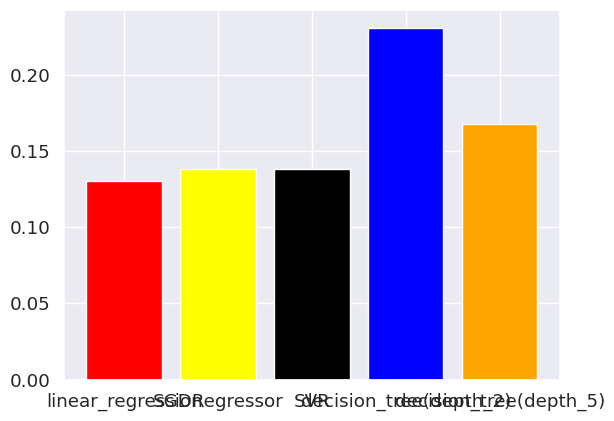

In [41]:
#plt.bar(list_name, list_score)
#plt.xlabel("Model_name")
#plt.ylabel("RMSE_score")
#plt.title("Model selection")
#plt.show()

#data
x = list_name
h = list_score
c = ['red', 'yellow', 'black', 'blue', 'orange']
 
#bar plot
plt.bar(x, h, color = c)
 
plt.show()
plt.rcParams["figure.figsize"] = (30, 10)
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 


In conclusion, it can be seen that the best model is linear regression.
Because linear regression does not require normalization or standardization.

It can be seen that decision trees did not produce a more accurate model, although depth 5 was better than depth 2 but still a less accurate model.

SVR produced a less accurate model but close to linear regression and so did the SGD model.

The conclusion is that the linear models are the ones that produced a more accurate model because they do not require normalization or standardization of the data and are less sensitive to the noise of the data that is still present and was not removed during the cleaning and preprocessing stages

![](https://etiquettejulie.com/wp-content/uploads/2017/01/thank-you-from-christian-vision-alliance.jpg)